In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import json
import os
from scipy import stats, integrate
import matplotlib.pyplot as plt

In [3]:
import seaborn as sns
sns.set(color_codes=True)

In [4]:
os.chdir('..')
%pwd

'/home/jyuwei/code/WordEmbedding-SubCulture/src'

In [5]:
with open('../result/state_prediction/epa', 'r') as fp:
    epa = np.array(json.load(fp))
print(epa.shape)
print(np.mean(epa, axis=0))
print(np.std(epa, axis=0))

(1535, 4, 3)
[[0.70723476 0.98625643 1.00427553]
 [0.91598237 1.04394839 1.02002446]
 [0.74807904 0.91702812 0.98290635]
 [0.82377914 0.91813606 0.83438298]]
[[1.61340015 1.34420306 1.25740497]
 [1.49462619 1.33083927 1.29835515]
 [1.49665259 1.31669402 1.3087317 ]
 [1.41132884 1.33070558 1.29981225]]


In [6]:
def plot(svo):
    with open('../result/state_prediction/general_%s' % svo, 'r') as fp:
        general = np.array(json.load(fp))
    with open('../result/state_prediction/github_%s' % svo, 'r') as fp:
        github = np.array(json.load(fp))
    with open('../result/state_prediction/twitter_%s' % svo, 'r') as fp:
        twitter = np.array(json.load(fp))
    for axis in range(0, 3):
        plt.figure()
        sns.distplot(epa[:, svo, axis], color='y')
        sns.distplot(general[:, axis], color='g')
        sns.distplot(github[:, axis], color='r')
        sns.distplot(twitter[:, axis], color='b')
    print('=====epa=====')
    print(np.mean(epa[:, svo, :], axis=0))
    print(np.std(epa[:, svo, :], axis=0))
    print(epa[:, svo, :].shape)
    print('=====github=====')
    print(np.mean(github, axis=0))
    print(np.std(github, axis=0))
    print(github.shape)
    print('=====twitter=====')
    print(np.mean(twitter, axis=0))
    print(np.std(twitter, axis=0))
    print(twitter.shape)

/home/jyuwei/.local/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


=====epa=====
[0.70723476 0.98625643 1.00427553]
[1.61340015 1.34420306 1.25740497]
(1535, 3)
=====github=====
[0.73608802 1.05439005 1.08165694]
[0.39154205 0.21431742 0.22707186]
(77, 3)
=====twitter=====
[0.67516839 1.02638439 1.04627242]
[0.47347643 0.25421907 0.26923969]
(98, 3)


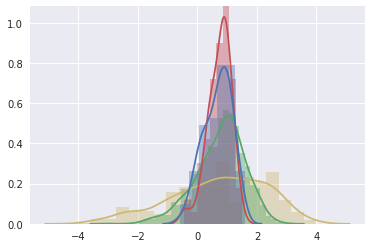

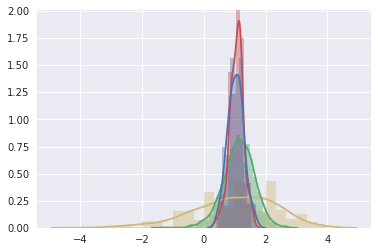

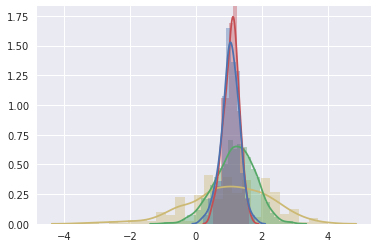

In [10]:
plot(0)

/home/jyuwei/.local/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


=====epa=====
[0.91598237 1.04394839 1.02002446]
[1.49462619 1.33083927 1.29835515]
=====github=====
[0.94382359 1.13451692 1.14457062]
[0.44018038 0.27405042 0.26690134]
=====twitter=====
[0.98355011 1.15384379 1.13455557]
[0.49357018 0.30914455 0.28611994]


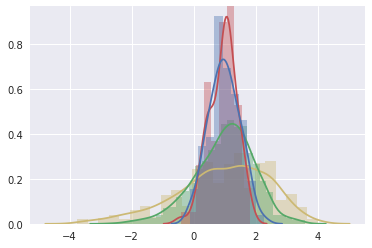

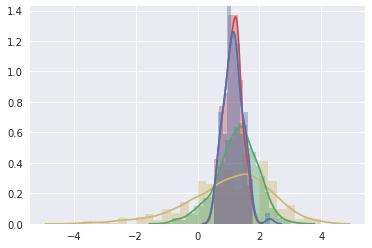

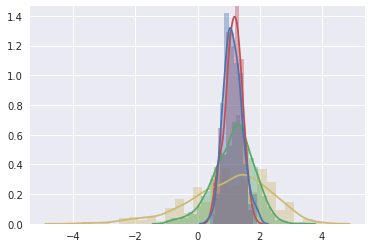

In [52]:
plot(1)

/home/jyuwei/.local/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


=====epa=====
[0.74807904 0.91702812 0.98290635]
[1.49665259 1.31669402 1.3087317 ]
=====github=====
[0.8808294  1.01046142 1.04941712]
[0.35817057 0.23967877 0.22324623]
=====twitter=====
[0.77420643 0.90230951 0.96848614]
[0.45207543 0.32061717 0.26434704]


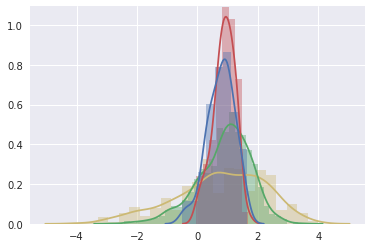

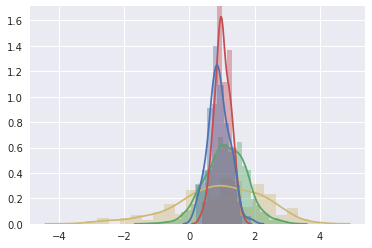

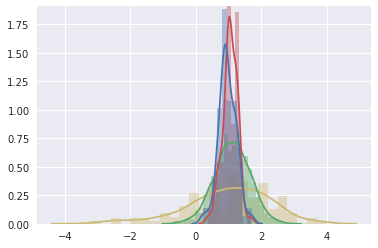

In [53]:
plot(2)

/home/jyuwei/.local/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


=====epa=====
[0.82377914 0.91813606 0.83438298]
[1.41132884 1.33070558 1.29981225]
=====github=====
[1.08435787 1.06503705 0.87263697]
[0.27462699 0.21256998 0.27650118]
=====twitter=====
[0.96307108 0.96201807 0.75736118]
[0.46097089 0.35781576 0.45287632]


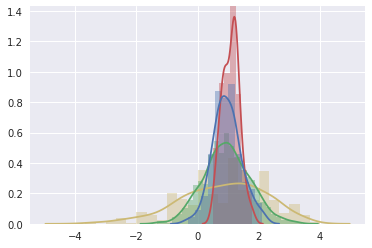

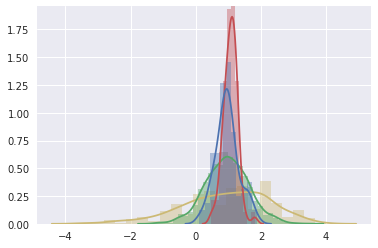

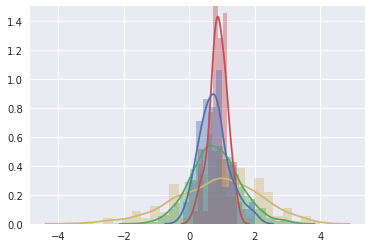

In [54]:
plot(3)

In [11]:
with open('../result/state_prediction/svo_epa', 'r') as fp:
    svo_epa = dict((str(item[0]), item[1]) for item in json.load(fp))
with open('../result/state_prediction/svo_general', 'r') as fp:
    svo_general = dict((str(item[0]), item[1]) for item in json.load(fp))
with open('../result/state_prediction/svo_github', 'r') as fp:
    svo_github = dict((str(item[0]), item[1]) for item in json.load(fp))
with open('../result/state_prediction/svo_twitter', 'r') as fp:
    svo_twitter = dict((str(item[0]), item[1]) for item in json.load(fp))

In [12]:
svo_general.keys()

dict_keys(["['FBI', 'held', 'Pakistan']", "['Boston', 'marks', 'anniversary']", "['Hillary', 'resist', 'businessmen']", "['Communities', 'question', 'FGM']", "['hotelier', 'murdered', 'murdered']", "['leak', 'ends', 'Dangerous']", "['Further', 'consolation', 'critics']", "['Catherine', 'arrive', 'Australia']", "['Korea', 'scuffle', 'border']", "['New', 'unveils', 'stackable']", "['Gaza', 'runs', 'deep']", "['Barclays', 'leave', 'banker']", "['Tillman', 'Blank', 'Marathon']", "['Modi', 'Wins', 'Elections']", "['Ambassador', 'Warns', 'War']", "['Figure', 'Taliban', 'Blank']", "['Blast', 'Shakes', 'Station']", "['Ireland', 'eyes', 'program']", "['town', 'celebrates', 'boy']", "['Alaska', 'arrested', 'connection']", "['Victims', 'Sue', 'Authorities']", "['Three', 'attack', 'bomb']", "['Irish', 'Jail', 'Irish']", "['Mob', 'Kills', 'Father']", "['chief', 'stop', 'Sudan']", "['China', 'troubled', 'rewards']", "['Police', 'question', 'hours']", "['U.N.', 'seeks', 'warlord']", "['questions', '9

In [13]:
svo_common = list(set(svo_github.keys()) & set(svo_twitter.keys()) & set(svo_general.keys()))
print(svo_common)
print(len(svo_common))

["['military', 'soldier', 'soldier']", "['statement', 'following', 'statement']", "['time', 'saw', 'alive']", "['branded', 'is', 'fake']", "['half', 'die', 'fire']", "['gold', 'nugget', 'discovered']", "['cocoa', 'blood', 'brain']", "['it', 'boost', 'naval']", "['education', 'arrested', 'relationship']", "['corn', 'change', 'diet']", "['colony', 'receives', 'human']", "['couple', 'still', 'couple']", "['plane', 'assessed', 'assessed']", "['army', 'withdraw', 'ready']", "['violence', 'worsens', 'west']", "['release', 'release', 'release']", "['bomb', 'killed', 'car']", "['emergency', 'meet', 'price']", "['architect', 'replaced', 'policy']", "['tomato', 'fight', 'embargo']", "['balloon', 'fire', 'balloon']", "['chief', 'intelligence', 'staying']", "['dead', 'blast', 'pipeline']", "['crashed', 'crashed', 'coast']", "['skeleton', 'found', 'cave']", "['plane', 'smoke', 'cockpit']", "['police', 'found', 'death']", "['player', 'identified', 'video']", "['passenger', 'passenger', 'killing']", 

In [14]:
for svo in svo_common:
    print(svo)
    print(svo_epa[svo])
    print(svo_general[svo])
    print(svo_github[svo])

['military', 'soldier', 'soldier']
[[1.6666666667, 3.0, 1.0], [1.6666666667, 2.6666666667, 2.0], [3.0, 1.0, 1.3333333333], [0.6666666667, 1.0, 1.3333333333]]
[[1.0601154195450189, 1.753088289216107, 1.1113841763627426], [1.7718484055746122, 2.1394687460520814, 1.832494322204184], [0.7457537816128761, 1.7140331443368928, 1.3656392070651526], [0.9797961076164767, 1.389967308063333, 1.6702465066475005]]
[[1.4492406593898801, 1.3431489576228357, 1.2145228388036242], [1.3181391490151784, 1.3652836492997555, 1.2983415172212232], [1.0969172525040936, 1.3312134370421702, 1.343699742535974], [1.1321710603147057, 1.2941506001763297, 1.3296766106389832]]
['statement', 'following', 'statement']
[[0.5, 1.5, 0.5], [1.5, 2.0, 1.5], [-0.5, 1.0, -1.5], [0.0, 2.5, 1.5]]
[[0.4073896498079879, 0.881160308182711, 0.0010841334957543136], [1.4675446950627604, 1.0827183563935407, 0.6524786915038081], [0.2686712883563708, 0.6380600491511879, 0.23749001498328715], [-0.2750097256499814, 0.7851885795503061, 0.698

In [15]:
def subplot(svo_axis):
    sub_svo_epa = np.array([svo_epa[svo][svo_axis] for svo in svo_common])
    sub_svo_github = np.array([svo_github[svo][svo_axis] for svo in svo_common])
    sub_svo_twitter = np.array([svo_twitter[svo][svo_axis] for svo in svo_common])
    print(sub_svo_epa.shape)
    for axis in range(0, 3):
        plt.figure()
        sns.distplot(sub_svo_epa[:, axis], color='y')
        sns.distplot(sub_svo_github[:, axis], color='r')
        sns.distplot(sub_svo_twitter[:, axis], color='b')

(73, 3)


/home/jyuwei/.local/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


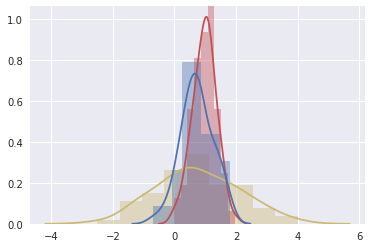

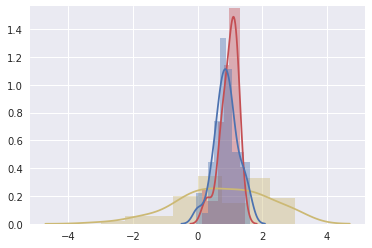

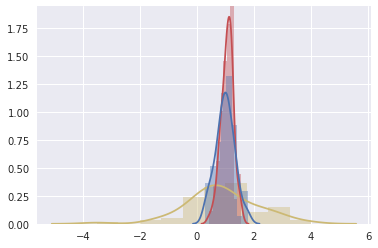

In [16]:
subplot(0)

(73, 3)


/home/jyuwei/.local/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


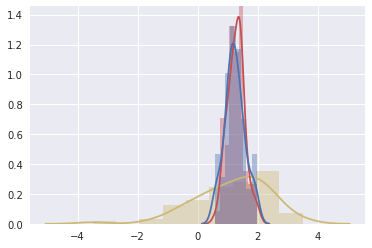

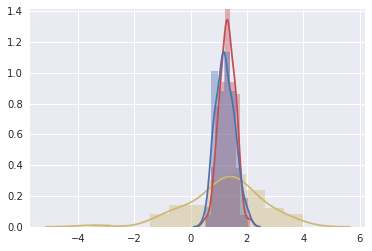

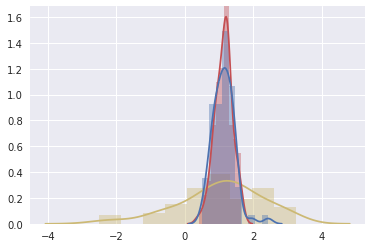

In [17]:
subplot(1)

(73, 3)


/home/jyuwei/.local/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


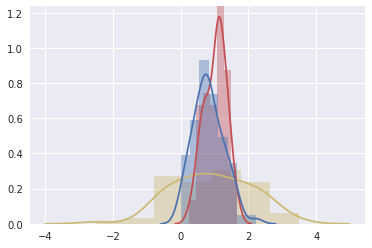

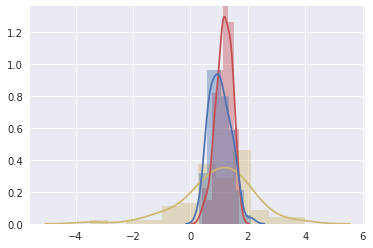

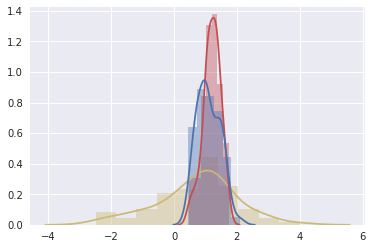

In [18]:
subplot(3)